In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [2]:
#1
z = 0.3
mean1 = 0
sig = 1
n = np.random.normal(loc=mean1, scale=sig, size = 10000)
far = float(len(np.where(n>=z)[0]))/len(n)
print 'False alarm rate = %f' %(far)

False alarm rate = 0.383300


In [3]:
#2
mean2 = 1
ns = np.random.normal(loc=mean2, scale=sig, size = 10000)
hr = float(len(np.where(ns>=z)[0]))/len(n)
print 'Hit rate = %f' %(hr)

Hit rate = 0.757300


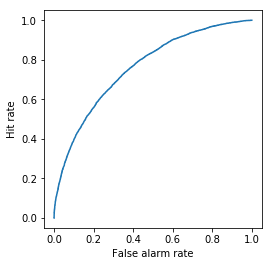

In [4]:
#3
label = np.zeros(2*len(n))
label[0:len(n)] = 1
label[len(n)+1:len(label)] = 2
r = np.concatenate((n,ns))
false_alarm, hit_rate, thresholds = metrics.roc_curve(label, r, pos_label=2)
plt.plot(false_alarm, hit_rate)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("False alarm rate")
plt.ylabel("Hit rate")

In [5]:
#4
auc = metrics.auc(false_alarm, hit_rate)
print 'AUC = %f' %(auc)

AUC = 0.760525


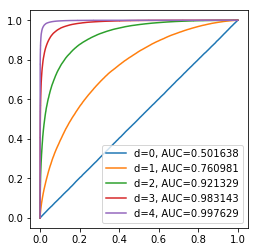

In [6]:
#5
def gen_roc(d):
    n = np.random.normal(loc=0, scale=sig, size = 100000)
    ns = np.random.normal(loc=d, scale=sig, size = 100000)
    r = np.concatenate((n,ns))   
    label = np.zeros(2*len(n))
    label[0:len(n)] = 1
    label[len(n)+1:len(label)] = 2    
    false_alarm, hit_rate, thresholds = metrics.roc_curve(label, r, pos_label=2)
    return false_alarm, hit_rate

for d in range(0,5):
    far, hr = gen_roc(d)
    auc = metrics.auc(far, hr)
    plt.plot(far,hr, label = "d=%d, AUC=%f" %(d, auc))

plt.gca().set_aspect('equal', adjustable='box')
plt.legend()



In [7]:
#6
def p_correct(d):
    n = np.random.normal(loc=0, scale=sig, size = 200000)
    ns = np.random.normal(loc=d, scale=sig, size = 200000)
    num_correct = 0
    for i in range(0,len(n)):
        if n[i] <= ns[i]:
            num_correct += 1
    return float(num_correct)/len(n)

for d in range(0,5):
    print "d=%d, Correct answer rate=%f" %(d, p_correct(d))

d=0, Correct answer rate=0.501270
d=1, Correct answer rate=0.761855
d=2, Correct answer rate=0.920505
d=3, Correct answer rate=0.983525
d=4, Correct answer rate=0.997795
